In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator

In [41]:
df = pd.read_csv('weather_dataset.csv',index_col='date',parse_dates=True)
df = df.fillna(0)
df.head()

,Ttb,Tx,Tn,R,Utb,Un,wind
date,,,,,,,
2015-01-01,14.7,25.3,9.3,0.0,75.0,33.0,2.0
2015-01-02,13.9,23.5,7.5,0.0,75.8,37.0,4.0
2015-01-03,14.1,21.0,9.5,0.0,83.5,54.0,4.0
2015-01-04,16.5,18.8,14.6,0.0,88.3,83.0,2.0
2015-01-05,19.0,22.6,16.5,0.0,87.0,72.0,2.0


<AxesSubplot:xlabel='date'>

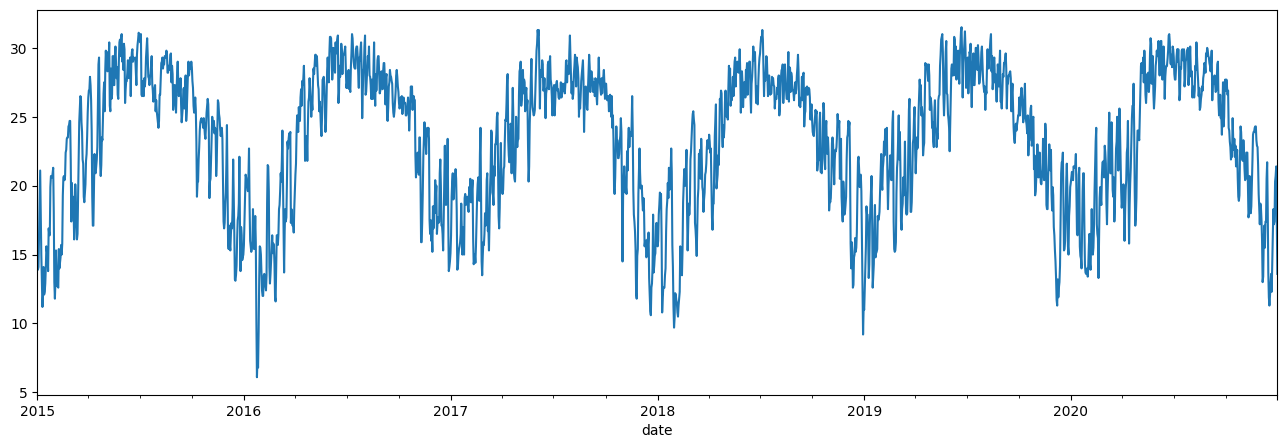

In [42]:
T_mean = df['Ttb']
T_mean.plot(figsize=(16,5))

In [89]:
scaler = MinMaxScaler()
T_mean = pd.DataFrame(T_mean)
T_train = T_mean.iloc[:2162]
T_test = T_mean.iloc[2162:]
scaler.fit(T_train)
T_train = scaler.transform(T_train)
T_test = scaler.transform(T_test)
type(T_mean)


pandas.core.frame.DataFrame

In [67]:
n_input = 5
generator = TimeseriesGenerator(T_train, T_train, length=n_input, batch_size=1)

In [68]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [118]:
n_features = 1
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100)               40800     
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 45,901
Trainable params: 45,901
Non-trainable params: 0
_________________________________________________________________


In [119]:
model.fit(generator, epochs = 16, verbose =2)

Epoch 1/16
2157/2157 - 8s - loss: 0.0139 - 8s/epoch - 4ms/step
Epoch 2/16
2157/2157 - 6s - loss: 0.0082 - 6s/epoch - 3ms/step
Epoch 3/16
2157/2157 - 5s - loss: 0.0057 - 5s/epoch - 3ms/step
Epoch 4/16
2157/2157 - 6s - loss: 0.0046 - 6s/epoch - 3ms/step
Epoch 5/16
2157/2157 - 6s - loss: 0.0043 - 6s/epoch - 3ms/step
Epoch 6/16
2157/2157 - 6s - loss: 0.0043 - 6s/epoch - 3ms/step
Epoch 7/16
2157/2157 - 6s - loss: 0.0043 - 6s/epoch - 3ms/step
Epoch 8/16
2157/2157 - 6s - loss: 0.0041 - 6s/epoch - 3ms/step
Epoch 9/16
2157/2157 - 6s - loss: 0.0041 - 6s/epoch - 3ms/step
Epoch 10/16
2157/2157 - 6s - loss: 0.0041 - 6s/epoch - 3ms/step
Epoch 11/16
2157/2157 - 6s - loss: 0.0041 - 6s/epoch - 3ms/step
Epoch 12/16
2157/2157 - 6s - loss: 0.0040 - 6s/epoch - 3ms/step
Epoch 13/16
2157/2157 - 6s - loss: 0.0040 - 6s/epoch - 3ms/step
Epoch 14/16
2157/2157 - 6s - loss: 0.0040 - 6s/epoch - 3ms/step
Epoch 15/16
2157/2157 - 6s - loss: 0.0040 - 6s/epoch - 3ms/step
Epoch 16/16
2157/2157 - 6s - loss: 0.0039 - 6s/ep

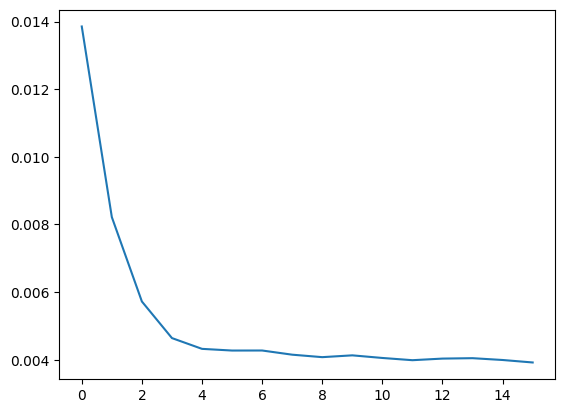

In [120]:
loss_per_poch = model.history.history['loss']
plt.plot(loss_per_poch)

In [121]:
last_train_batch = T_train[-5:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model.predict(last_train_batch)

1/1 [==============================] - 0s 267ms/step


array([[0.54163164]], dtype=float32)

In [122]:
T_test[0]

array([0.48425197])

In [123]:
test_predictions = []

first_eval_batch = T_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(T_test)):
    print(model.predict(current_batch))
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 32ms/step
[[0.54163164]]
1/1 [==============================] - 0s 40ms/step
[[0.5704481]]
1/1 [==============================] - 0s 32ms/step
[[0.5851977]]
1/1 [==============================] - 0s 40ms/step
[[0.59412223]]
1/1 [==============================] - 0s 32ms/step
[[0.6037245]]
1/1 [==============================] - 0s 32ms/step
[[0.61469376]]
1/1 [==============================] - 0s 32ms/step
[[0.6270294]]
1/1 [==============================] - 0s 40ms/step
[[0.63978434]]
1/1 [==============================] - 0s 24ms/step
[[0.651909]]
1/1 [==============================] - 0s 32ms/step
[[0.66372836]]
1/1 [==============================] - 0s 32ms/step
[[0.67802066]]
1/1 [==============================] - 0s 24ms/step
[[0.6975568]]
1/1 [==============================] - 0s 24ms/step
[[0.72198457]]
1/1 [==============================] - 0s 24ms/step
[[0.7496819]]
1/1 [==============================] - 0s 24ms/step
[[0.778672]]
1/1 [

In [124]:
true_predictions = scaler.inverse_transform(test_predictions)

In [125]:
Test =  T_mean.iloc[2162:]
Test['Predictions'] = true_predictions

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9864\4023211908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['Predictions'] = true_predictions


In [126]:
Test

,Ttb,Predictions
date,,
2020-12-02,18.4,19.857444
2020-12-03,17.5,20.589382
2020-12-04,16.0,20.964021
2020-12-05,13.0,21.190705
2020-12-06,13.4,21.434602
2020-12-07,16.1,21.713222
2020-12-08,17.1,22.026547
2020-12-09,15.5,22.350522
2020-12-10,17.4,22.658488


<AxesSubplot:xlabel='date'>

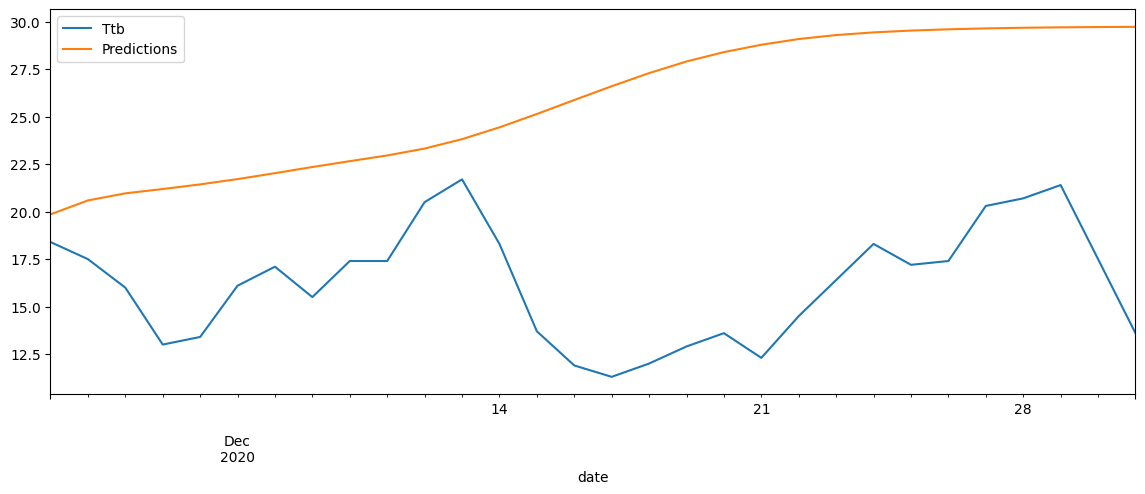

In [127]:
Test.plot(figsize=(14,5))